# Исследование надежности заемщиков

---
<a id='contens'></a> 
# Оглавление
1. [Цель проекта](#goal)
2. [Задачи проекта](#task)
3. [Описание данных](#data_name)
4. [Импорт библиотек](#import_bibl)
5. [Функции](#function)
6. [Загрузка данных и изучение общей информации](#import)
7. [Предобработка данных](#preprocessing)\
    7.1 [Изучение пропусков](#pass)\
    7.2 [Проверка на наличие дубликатов](#check_dubl)\
    7.3 [Изменение типа данных](#change_types)\
    7.4 [Исследование аномалий в данных](#anomaly)\
    7.5 [Категоризация данных](#category)
8. [Исследовательский анализ данных](#eda)\
    8.1 [Портрет типичных клиентов](#portrait)\
    8.2 [Решения по вопросам](#eda2)\
        8.2.1 [Есть ли зависимость между количеством детей и возвратом кредита в срок?](#question1)\
        8.2.2 [Есть ли зависимость между семейным положением и возвратом кредита в срок?](#question2)\
        8.2.3 [Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#question3)\
        8.2.4 [Как разные цели кредита влияют на его возврат в срок?](#question4)
9. [Выводы](#conclution)

---
<a id='customer'></a> 
## Заказчик
[Назад к оглавлению](#contens)

Кредитный отдел банка

---
<a id='goal'></a> 
## Цель проекта
[Назад к оглавлению](#contens)

Анализ платежеспособности клиентов банка. Изучение зависимости семейного положения и количества детей на погашение кредита в срок.

---
<a id='task'></a> 
## Задачи проекта
[Назад к оглавлению](#contens)

Изучение зависимости между возвратом кредита в срок и 
- количеством детей;
- семейным положением;
- уровнем дохода;
- целью кредита.

---
<a id='data_name'></a> 
## Описание данных
[Назад к оглавлению](#contens)

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

---
<a id='import_bibl'></a> 
## Импорт библиотек
[Назад к оглавлению](#contens)

In [17]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import set_matplotlib_formats
import scipy.stats as st
import warnings; warnings.filterwarnings(action = 'ignore')

In [18]:
# добавим опции для отображения таблиц и данных
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format ='{:,.2f}'.format
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
# добавим настройки для диагмрамм
sns.set_style('dark')
custom_palette = ['#16537e', '#cfe2f3', '#9fc5e8', '#6fa8dc', '#3d85c6', '#0b5394', '#073763', '#62a7d7',
                 '#9dbbd5', '#7b95ac', '#697c8c', '#b1d5f5', '#246cac', '#204e77', '#76a5af']
sns.set_palette(custom_palette)
sns.set_context('notebook') 

---
<a id='function'></a> 
## Функции
[Назад к оглавлению](#contens)

---
<a id='df_study'></a> 
### Функция df_study
[Назад к оглавлению](#contens)\
[Перейти к месту использования функции в проекте](#df_study_use)

In [20]:
# напишем функцию для изучения основных характеристик датафрейма
def df_study(df):
      
    # изучим начало и конец выборки
    display(df.head(10), df.tail(10))

    # изучим информацию о датафрейме
    display(df.info())
    
    # изучим статистические показатели
    display(df.describe())
    
    print('-'*50)
    # изучим количество строк и столбцов
    print('Количество строк и столбцов:', df.shape)   

    print('-'*50)
    # посчитаем количество явных дубликатов
    dubl = df.duplicated().sum()
    print('Количество явных дубликатов:' , dubl)
    
    # посчитаем долю дубликатов
    dubl_share = dubl/len(df)
    print(f'Доля явных дубликатов: {dubl_share:.2%}')
    
    print('-'*50)
    # посчитаем количество пропусков
    gap = df.isna().sum()
    print('Количество пропусков:', gap)
    
    # посчитаем долю пропусков
    gap_share = ((df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100).round(2)
    print()
    print('Доля пропусков:')
    display(gap_share)
    
    # зададим масимальную ширину столбца
    pd.set_option('max_colwidth', 100) 

---
<a id='import'></a> 
## Загрузка данных и изучение общей информации
[Назад к оглавлению](#contens)

In [21]:
# загружаем файл
try:
    df = pd.read_csv('/datasets/data.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

<a id='df_study_use'></a> 
Для изучения датафрейма используем написанную функцию.\
[Перейти к функции](#df_study)

In [22]:
# изучим основную информацию
df_study(df)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,"-8,437.67",42,высшее,0,женат / замужем,0,F,сотрудник,0,"253,875.64",покупка жилья
1,1,"-4,024.80",36,среднее,1,женат / замужем,0,F,сотрудник,0,"112,080.01",приобретение автомобиля
2,0,"-5,623.42",33,Среднее,1,женат / замужем,0,M,сотрудник,0,"145,885.95",покупка жилья
3,3,"-4,124.75",32,среднее,1,женат / замужем,0,M,сотрудник,0,"267,628.55",дополнительное образование
4,0,"340,266.07",53,среднее,1,гражданский брак,1,F,пенсионер,0,"158,616.08",сыграть свадьбу
5,0,-926.19,27,высшее,0,гражданский брак,1,M,компаньон,0,"255,763.57",покупка жилья
6,0,"-2,879.20",43,высшее,0,женат / замужем,0,F,компаньон,0,"240,525.97",операции с жильем
7,0,-152.78,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,"135,823.93",образование
8,2,"-6,929.87",35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,"95,856.83",на проведение свадьбы
9,0,"-2,188.76",41,среднее,1,женат / замужем,0,M,сотрудник,0,"144,425.94",покупка жилья для семьи


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.69,28,среднее,1,женат / замужем,0,F,сотрудник,1,"109,486.33",заняться образованием
21516,0,-914.39,42,высшее,0,женат / замужем,0,F,компаньон,0,"322,807.78",покупка своего жилья
21517,0,-404.68,42,высшее,0,гражданский брак,1,F,компаньон,0,"178,059.55",на покупку своего автомобиля
21518,0,"373,995.71",59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,"153,864.65",сделка с автомобилем
21519,1,"-2,351.43",37,ученая степень,4,в разводе,3,M,сотрудник,0,"115,949.04",покупка коммерческой недвижимости
21520,1,"-4,529.32",43,среднее,1,гражданский брак,1,F,компаньон,0,"224,791.86",операции с жильем
21521,0,"343,937.40",67,среднее,1,женат / замужем,0,F,пенсионер,0,"155,999.81",сделка с автомобилем
21522,1,"-2,113.35",38,среднее,1,гражданский брак,1,M,сотрудник,1,"89,672.56",недвижимость
21523,3,"-3,112.48",38,среднее,1,женат / замужем,0,M,сотрудник,1,"244,093.05",на покупку своего автомобиля
21524,2,"-1,984.51",40,среднее,1,женат / замужем,0,F,сотрудник,0,"82,047.42",на покупку автомобиля


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


None

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,"21,525.00","19,351.00","21,525.00","21,525.00","21,525.00","21,525.00","19,351.00"
mean,0.54,"63,046.50",43.29,0.82,0.97,0.08,"167,422.30"
std,1.38,"140,827.31",12.57,0.55,1.42,0.27,"102,971.57"
min,-1.00,"-18,388.95",0.00,0.00,0.00,0.00,"20,667.26"
25%,0.00,"-2,747.42",33.00,1.00,0.00,0.00,"103,053.15"
50%,0.00,"-1,203.37",42.00,1.00,0.00,0.00,"145,017.94"
75%,1.00,-291.10,53.00,1.00,1.00,0.00,"203,435.07"
max,20.00,"401,755.40",75.00,4.00,4.00,1.00,"2,265,604.03"


--------------------------------------------------
Количество строк и столбцов: (21525, 12)
--------------------------------------------------
Количество явных дубликатов: 54
Доля явных дубликатов: 0.25%
--------------------------------------------------
Количество пропусков: children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Доля пропусков:


days_employed      10.10
total_income       10.10
children            0.00
dob_years           0.00
education           0.00
education_id        0.00
family_status       0.00
family_status_id    0.00
gender              0.00
income_type         0.00
debt                0.00
purpose             0.00
dtype: float64

---
    
В датафрейме 21525 записей.\
Обнаруженные проблемы:
- наличие явных дубликатов;
- наличие пропусков в данных с количеством дней трудоустройства и дохода;
- прыгающий регистр в данных.

Необходима предобработка и более точная проверка данных.

---

---
<a id='preprocessing'></a> 
## Предобработка данных
[Назад к оглавлению](#contens)

---
<a id='pass'></a> 
### Изучение пропусков
[Назад к оглавлению](#contens)

Исследование общей информации показало наличие пропусков в столбцах с общим трудовым стажем (10%) и ежемесчным доходом (10%).
Пропуски в столбце с возрастом удалим, так как их количество мало, удаление не окажет значительного влияния на результаты дальнейшего исследования.
\
На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`. Пропуски в столбце со стажем заполним аналогичным образом.

In [23]:
# заполняем пропуски
for t in df['income_type'].unique():
    df.loc[(df['income_type'] == t) & (df['total_income'].isna()), 'total_income'] = \
    df.loc[(df['income_type'] == t), 'total_income'].median()
    
for t in df['income_type'].unique():
    df.loc[(df['income_type'] == t) & (df['days_employed'].isna()), 'days_employed'] = \
    df.loc[(df['income_type'] == t), 'days_employed'].median()

In [24]:
# проверяем заполнение пропусков
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

---
<a id='check_dubl'></a> 
### Проверка на наличие дубликатов
[Назад к оглавлению](#contens)

Для поиска дубликатов приведем все текстовые данные в датасете к нижнему регистру.

In [25]:
# приведем данные к нижнему регистру

for i in df[['education', 'family_status', 'income_type', 'purpose']]:
    df[i] = df[i].str.lower()
    
# посмотрим на количество дубликатов
df.duplicated().sum()

71

In [26]:
# удалим дубликаты
df = df.drop_duplicates()

# проверяем
df.duplicated().sum()

0

---
<a id='change_types'></a> 
### Изменение типа данных
[Назад к оглавлению](#contens)

In [27]:
# изменим тип данных в столбце с ежемесячным доходом на целочисленный
df['total_income'] = df['total_income'].astype(int)

---
<a id='anomaly'></a> 
### Исследование аномалий в данных
[Назад к оглавлению](#contens)

Посмотрим, нет ли ошибок у качественных данных: образование, семейное положение, пол, тип занятости. Данные с целью кредитования рассмотрим позднее.

In [28]:
quality_list = ['education', 'family_status', 'gender', 'income_type']
for i in quality_list:
    display(df[i].value_counts())
    print('-'*50)

среднее                15172
высшее                  5250
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

--------------------------------------------------


женат / замужем          12339
гражданский брак          4151
не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

--------------------------------------------------


F      14174
M       7279
XNA        1
Name: gender, dtype: int64

--------------------------------------------------


сотрудник          11084
компаньон           5078
пенсионер           3829
госслужащий         1457
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

--------------------------------------------------


В данных привлекает внимание одна запись с полом "XNA". Предполагаю, что пол клиента не указан в системе по каким-либо причинам (человеческий фактор или техническая ошибка). Так как запись всего одна, удалим ее. 

In [29]:
# удалим запись 
df = df.query('gender != "XNA"')

# проверка
df['gender'].unique()

array(['F', 'M'], dtype=object)

Посмотрим на стат. показатели числовых данных.

In [30]:
# изучим стат. показатели
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,"21,453.00","21,453.00","21,453.00","21,453.00","21,453.00","21,453.00","21,453.00"
mean,0.54,"63,307.57",43.27,0.82,0.97,0.08,"165,317.77"
std,1.38,"140,949.64",12.57,0.55,1.42,0.27,"98,189.24"
min,-1.00,"-18,388.95",0.00,0.00,0.00,0.00,"20,667.00"
25%,0.00,"-2,575.93",33.00,1.00,0.00,0.00,"107,620.00"
50%,0.00,"-1,354.49",42.00,1.00,0.00,0.00,"142,594.00"
75%,1.00,-317.28,53.00,1.00,1.00,0.00,"195,818.00"
max,20.00,"401,755.40",75.00,4.00,4.00,1.00,"2,265,604.00"


Таблица позволила выявить аномальные значения в столбце с количеством детей (-1 и 20) и возрастом клиетов (0 лет). Посмотрим какое количество клиентов банка  имеют данные значения. Также стоит обратить внимание на наличие отрицательных значений в столбце с общим трудовым стажем.

In [31]:
# посмотрим на количество записей с аномальными данными
display(df['children'].value_counts())
df['dob_years'].value_counts()

 0     14090
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

35    616
40    607
41    605
34    601
38    597
42    596
33    581
39    572
31    559
36    554
44    545
29    544
30    537
48    536
37    536
50    513
43    512
32    509
49    508
28    503
45    496
27    493
52    484
56    483
47    477
54    476
46    472
53    459
57    456
58    454
51    446
59    443
55    443
26    408
60    374
25    357
61    354
62    348
63    269
24    263
64    260
23    252
65    193
22    183
66    182
67    167
21    111
0     101
68     99
69     85
70     65
71     56
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

Количество записей с аномальными данными составляют примерно 1% от всего датасета. Поэтому удалим их.

In [32]:
# удалим аномальные данные
df = df.query('((children != -1) & (children != 20)) & dob_years != 0') 

Отрицательные данные в столбце с данными об общем трудовом стаже скорее всего техническая ошибка. Для ее устранения используем модуль.

In [33]:
# возведение столбца со стажем в модуль
df['days_employed'] = abs(df['days_employed'])

# проверка
df['days_employed'].describe()

count    21,230.00
mean     67,116.89
std     139,254.23
min          24.14
25%       1,024.69
50%       1,999.84
75%       5,338.27
max     401,755.40
Name: days_employed, dtype: float64

Для удобства анализа данных подсчитаем стаж в годах.

In [34]:
# рассчет стажа в годах
df['years_employed'] = df['days_employed'] / 365

# посмотрим на стат. показатели
df['years_employed'].describe()

count   21,230.00
mean       183.88
std        381.52
min          0.07
25%          2.81
50%          5.48
75%         14.63
max      1,100.70
Name: years_employed, dtype: float64

Таблица показывает, что в датасете есть аномальные данные. Для более точного анализа "почистим" датасет. Установим пороговое значение в 65 лет.

In [35]:
# удалим аномальные данные
df = df.query('years_employed <= 65') 

Исследуем данные о ежемесячном доходе клиентов: посмотрим на распределение данных, изучим максимальное, минимальное, среднее значения и медиану.

count      17,436.00
mean      171,926.16
std       101,420.62
min        21,367.00
25%       112,420.75
50%       148,482.50
75%       202,041.75
max     2,265,604.00
Name: total_income, dtype: float64

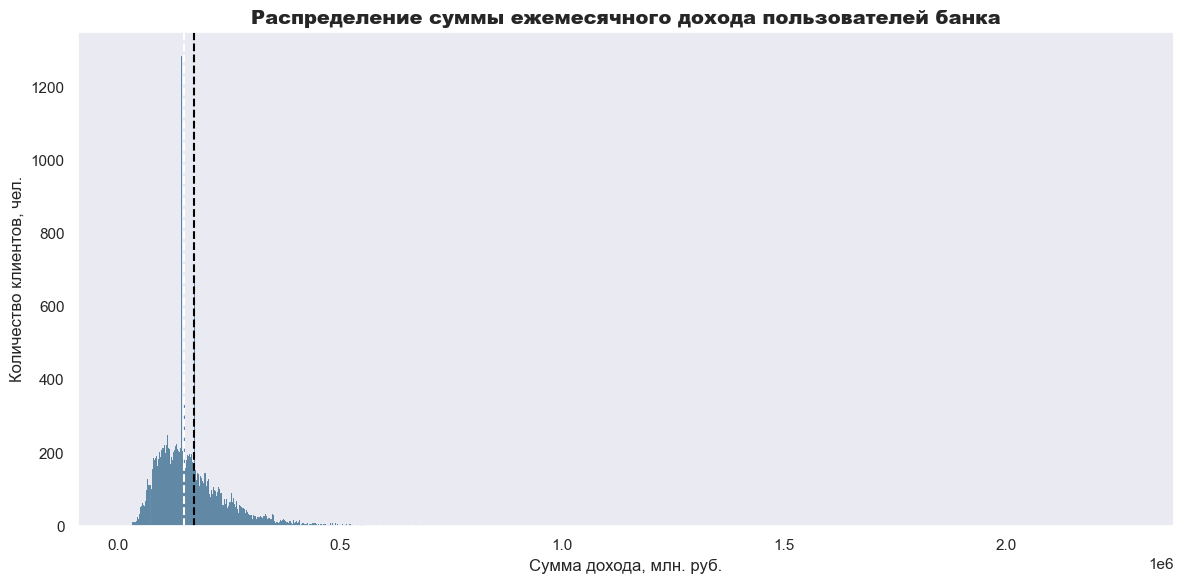

In [36]:
# посмотрим на стат. показатели поля
display(df['total_income'].describe())

# для графика подсчитаем медиану и среднее 
balance_median = df['total_income'].median()
balance_mean = df['total_income'].mean()

# отразим данные на графике
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['total_income'], bins=1000, legend=True)
ax.set_title('Распределение суммы ежемесячного дохода пользователей банка', size=14, weight= 900)
ax.set_ylabel('Количество клиентов, чел.')
ax.set_xlabel('Сумма дохода, млн. руб.')
plt.axvline(x=df['total_income'].median(), color='white', linestyle='--', label='Среднее медианное дохода')
plt.axvline(x=df['total_income'].mean(), color='black', linestyle='--', label='Среднее дохода')
plt.tight_layout()
plt.show()

Посмотрим на этот график подробнее.

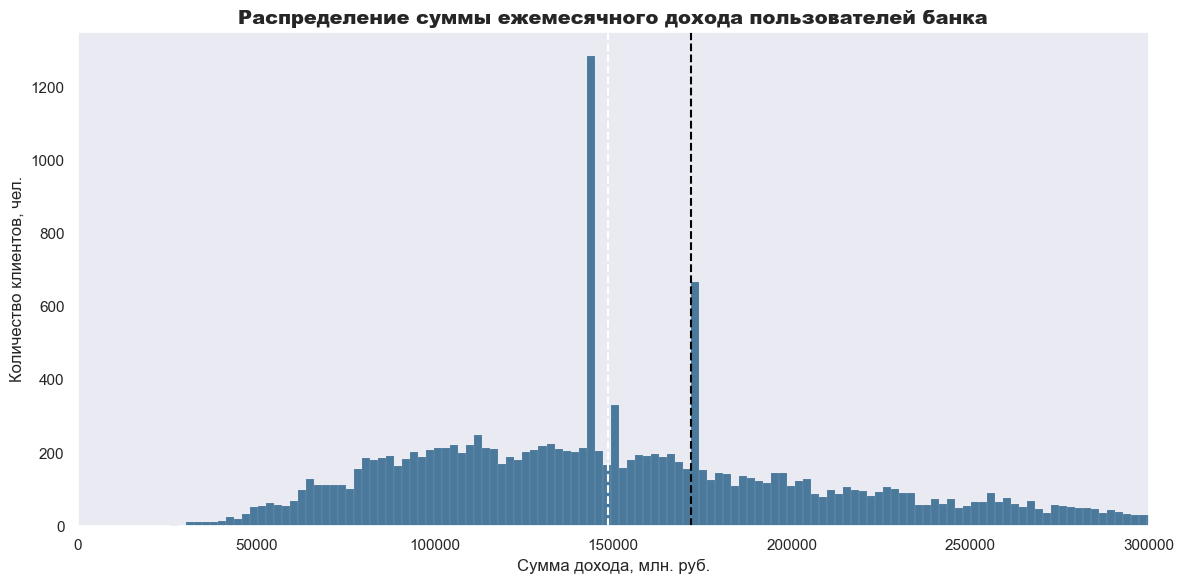

In [37]:
# отразим данные на графике
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['total_income'], bins=1000, legend=True)
ax.set_title('Распределение суммы ежемесячного дохода пользователей банка', size=14, weight= 900)
ax.set_ylabel('Количество клиентов, чел.')
ax.set_xlabel('Сумма дохода, млн. руб.')
plt.xlim([0, 300000])
plt.axvline(x=df['total_income'].median(), color='white', linestyle='--', label='Среднее медианное дохода')
plt.axvline(x=df['total_income'].mean(), color='black', linestyle='--', label='Среднее дохода')
plt.tight_layout()
plt.show()

Минимальное значение дохода - 20.6 тыс.руб., \
Максимальное значение - 2.3 млн. руб.\
Среднее значение - 165.4 тыс. руб.\
Медиана - 142.6 тыс. руб.\
Основная доля клиентов имеет доход до 200 тыс. руб.
\
\
Для выбора границы для определения аномальных значений рассчитаем 90, 95 и 99  перцентили дохода клиентов.

In [38]:
# находит перцентили
per_income_90 = np.percentile(df['total_income'], [90])
per_income_95 = np.percentile(df['total_income'], [95])
per_income_99 = np.percentile(df['total_income'], [99])
print('90 перцентиль: %.2f' % (per_income_90))
print('95 перцентиль: %.2f' % (per_income_95))
print('99 перцентиль: %.2f' % (per_income_99))

90 перцентиль: 277769.50
95 перцентиль: 340830.75
99 перцентиль: 519616.95


Не более 10% пользователей имеют доход, равный 270 тыс. руб., не более 5% - 332 тыс. руб., и не более 1% - 506 тыс. руб.

Подсчитаем сколько данных осталось после предобработки.

In [39]:
# подсчитаем количество записей после предобрадотки
print('Количество записей: %.f' % (len(df)))
print('Доля оставшихся записей: %.2f' % ((len(df)/21525)*100))

Количество записей: 17436
Доля оставшихся записей: 81.00


---
<a id='category'></a> 
### Категоризация данных
[Назад к оглавлению](#contens)

На основании диапазонов, указанных ниже, создадим в датафрейме столбец total_income_category с категориями:\
0–30000 — E\
30001–50000 — D\
50001–200000 — C\
200001–1000000 — B\
1000001 и выше — A.

In [40]:
# напишем функцию для категоризации дохода
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass
    
# применим ее
df['total_income_category'] = df['total_income'].apply(categorize_income)

Изучим цели получения кредита.

In [41]:
# посмотрим на уникальные значения в столбце с целями
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'операции с жильем', 'образование',
       'на проведение свадьбы', 'покупка жилья для семьи',
       'покупка недвижимости', 'покупка коммерческой недвижимости',
       'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку своего автомобиля',
       'на покупку подержанного автомобиля', 'сыграть свадьбу', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'операции с коммерческой недвижимостью', 'свой автомобиль',
       'сделка с автомобилем', 'профильное образование',
       'высшее образование', 'на покупку автомобиля',
      

Создадим функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:

- операции с автомобилем
- операции с недвижимостью
- проведение свадьбы
- получение образования.

In [42]:
# напишем функцию для категоризации целей
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'
    
# применим ее
df['purpose_category'] = df['purpose'].apply(categorize_purpose)

---
**В процессе предобработки данных** были выполнены следующие действия:
- заполнены пропуски в столбце со стажем и доходом;
- удалены пропуски в данных с возрастом клиентов;
- удалены дубликаты;
- изменен тип данных в столбце с доходом клиентов;
- изучены аномальные значения в полях с полом клиентов, количеством детей, возрастом и стажем;
- проведена категоризация данных.
\
\
В процессе предобработки были удалено 19% данных.

---
<a id='eda'></a> 
## Исследовательский анализ данных
[Назад к оглавлению](#contens)

---
<a id='portrait'></a> 
### Портрет типичных клиентов
[Назад к оглавлению](#contens)

Составим портрет клиентов банка и посмотрим на различия в показателях в зависимости от наличия и отсутсвия задолженности.

In [43]:
# составим таблицу по клиентам в разрезе по задолженности
churn_diff = df.groupby('debt')[['children', 'years_employed', 'dob_years', 'total_income']].agg(['mean', 'median']).T
churn_diff

debt                           0          1
children       mean         0.55       0.60
               median       0.00       0.00
years_employed mean         6.39       4.97
               median       4.31       3.94
dob_years      mean        40.22      37.99
               median      40.00      37.00
total_income   mean   172,598.04 164,829.49
               median 149,296.50 142,594.00

Можно сделать вывод об отсутсвии значительной разницы в показателях для должников и клиентов без задолженности. 

---
<a id='eda2'></a> 
### Решения по вопросам
[Назад к оглавлению](#contens)

---
<a id='question1'></a> 
#### Есть ли зависимость между количеством детей и возвратом кредита в срок?
[Назад к оглавлению](#contens)

In [44]:
# создание сводной таблицы, в которой будет отражена группировка по количеству детей и информация о количестве человек, 
# у которых была (1) и отсутствовала (0) задолженость по кредиту 

corr_children_debt = df.pivot_table(index = ['children'], columns = 'debt', values = 'purpose', aggfunc = 'count')

# добавление в таблицу столбца 'total', в котором отрабражено общее количество человек в группах
corr_children_debt.insert(0, 'total', df.groupby('children')['debt'].count(), allow_duplicates = True) 

# расчет процентного соотношения лиц, имеющих задолженность по кредиту, от общего количества человек в группе
corr_children_debt['ratio_debt'] = corr_children_debt[1] / corr_children_debt['total'] * 100

# изменение отображаемого нулевого значения в последней группе (Nan на 0)
corr_children_debt = corr_children_debt.fillna(0)

# расчет разницы между максимальным и минимальным значением показателя
# исключаем последнюю группу в связи с непоказательной выборкой
difference_children = corr_children_debt.loc[:4, 'ratio_debt'].max() - corr_children_debt.loc[:4, 'ratio_debt'].min()

# отображение итоговой таблицы
corr_children_debt

debt,total,0,1,ratio_debt
children,,,,
0,10530,"9,669.00",861.00,8.18
1,4516,"4,090.00",426.00,9.43
2,2019,"1,828.00",191.00,9.46
3,322,296.00,26.00,8.07
4,40,36.00,4.00,10.00
5,9,9.00,0.00,0.00


In [45]:
f'Разница между максимальным и минимальным значением составляет, {difference_children:.3} %'

'Разница между максимальным и минимальным значением составляет, 1.93 %'

**Вывод:** Исследование показало, что меньший показатель и, следовательно, меньшее количество задолженностей по кредиту у лиц c 3 и более детьми (8.1%). Можно предположить, что семьи с 3 детьми более ответсвенно подходят к выплате кредита в связи с тем, что более заинтересованы в хорошей кредитной истории для следующих кредитов. Далее идет группа лиц без детей (8.2%). Данный вывод логичен, так как в семьх без детей меньшее количество ежемесячных затрат.У лиц с 1, 2 и 4 детьми практически одинаковые показатели. Стоит обратить внимание на группу клиентов с 5 детьми. Процент задолженности по кредиту равен 0. Но выборка по данной группе не репрезентативна ввиду ее маленького размера по сравнению с остальными группами.

---
<a id='question2'></a> 
#### Есть ли зависимость между семейным положением и возвратом кредита в срок?
[Назад к оглавлению](#contens)

In [46]:
# создание сводной таблицы, в которой будет отражена группировка по семейному положению и информация о количестве человек, 
# у которых была (1) и отсутствовала (0) задолженость по кредиту 

corr_family_debt = df.pivot_table(index = ['family_status'], columns = 'debt', values = 'purpose', aggfunc = 'count')


# добавление в таблицу столбца 'total', в котором отрабражено общее количество человек в группах
corr_family_debt.insert(0, 'total', df.groupby('family_status')['debt'].count(), allow_duplicates = True)

# расчет процентного соотношения лиц, имеющих задолженность по кредиту, от общего количества человек в группе
corr_family_debt['ratio_debt'] = corr_family_debt[1] / corr_family_debt['total'] * 100

# расчет разницы между максимальным и минимальным значением показателя
difference_family = corr_family_debt['ratio_debt'].max() - corr_family_debt['ratio_debt'].min()

corr_family_debt

debt,total,0,1,ratio_debt
family_status,,,,
в разводе,963,892,71,7.37
вдовец / вдова,419,393,26,6.21
гражданский брак,3465,3118,347,10.01
женат / замужем,10154,9346,808,7.96
не женат / не замужем,2435,2179,256,10.51


In [47]:
f'Разница между максимальным и минимальным значением составляет, {difference_family:.3} %'

'Разница между максимальным и минимальным значением составляет, 4.31 %'

Вывод: Анализ данных показал, что есть незначительная зависимость между семейным положением и выплатой кредита в срок. Низкие показатели характерны для вдовцов/вдов (6.21%). Максимальный показатель у не женатых/ не замужних (10.51%).

---
<a id='question3'></a> 
#### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
[Назад к оглавлению](#contens)

In [48]:
# создание сводной таблицы, в которой будет отражена группировка по уровню доходов и информация о количестве человек, 
# у которых была (1) и отсутствовала (0) задолженость по кредиту 

corr_income_debt = df.pivot_table(index = ['total_income_category'], columns = 'debt', values = 'purpose', aggfunc = 'count')

# добавление в таблицу столбца 'total', в котором отрабражено общее количество человек в группах
corr_income_debt.insert(0, 'total', df.groupby('total_income_category')['debt'].count(), allow_duplicates = True)

# добавление в таблицу столбца 'income' с расшифровкой дохода в категориях
corr_income_debt.insert(0, 'income', ['более 1000000', 'от 200000 до 1000000', 'от 50000 до 200000', \
                                      'от 30000 до 50000','до 30000'], allow_duplicates = True)

# расчет процентного соотношения лиц, имеющих задолженность по кредиту, от общего количества человек в группе
corr_income_debt['ratio_debt'] = corr_income_debt[1] / corr_income_debt['total'] * 100

# расчет разницы между максимальным и минимальным значением показателя
difference_income = corr_income_debt['ratio_debt'].max() - corr_income_debt['ratio_debt'].min()

corr_income_debt

debt,income,total,0,1,ratio_debt
total_income_category,,,,,
A,более 1000000,25,23.00,2.00,8.00
B,от 200000 до 1000000,4439,"4,117.00",322.00,7.25
C,от 50000 до 200000,12781,"11,611.00","1,170.00",9.15
D,от 30000 до 50000,184,170.00,14.00,7.61
E,до 30000,7,7.00,NaN,NaN


In [49]:
f'Разница между максимальным и минимальным значением составляет, {difference_income:.3} %'

'Разница между максимальным и минимальным значением составляет, 1.9 %'

**Вывод:** Анализ данных показал, что наибольший показатель и, следовательно, большее количество задолженность по выплате кредита у лиц с доходом от 50 до 200 тыс. руб. (9.15%). Самый низкий показатель у лиц с доходом от 200 тыс. руб. до 1000 тыс. руб. (7.25%).

---
<a id='question4'></a> 
#### Как разные цели кредита влияют на его возврат в срок?
[Назад к оглавлению](#contens)

In [50]:
# создание сводной таблицы, в которой будет отражена группировка по уровню доходов и информация о количестве человек, 
# у которых была (1) и отсутствовала (0) задолженость по кредиту 

corr_purpose_debt = df.pivot_table(index = ['purpose_category'], columns = 'debt', values = 'purpose', aggfunc = 'count')

# добавление в таблицу столбца 'total', в котором отрабражено общее количество человек в группах
corr_purpose_debt.insert(0, 'total', df.groupby('purpose_category')['debt'].count(), allow_duplicates = True)

# расчет процентного соотношения лиц, имеющих задолженность по кредиту, от общего количества человек в группе
corr_purpose_debt['ratio_debt'] = corr_purpose_debt[1] / corr_purpose_debt['total'] * 100

# расчет разницы между максимальным и минимальным значением показателя
difference_purpose = corr_purpose_debt['ratio_debt'].max() - corr_purpose_debt['ratio_debt'].min()

corr_purpose_debt

debt,total,0,1,ratio_debt
purpose_category,,,,
операции с автомобилем,3470,3123,347,10.00
операции с недвижимостью,8830,8146,684,7.75
получение образования,3257,2936,321,9.86
проведение свадьбы,1879,1723,156,8.30


In [51]:
f'Разница между максимальным и минимальным значением составляет, {difference_purpose:.3} %'

'Разница между максимальным и минимальным значением составляет, 2.25 %'

**Вывод:**  Исследование данных показало, что лица, которые берут кредит на операции с автомобилем и получение образования чаще остальных имеют задолженность по выплате кредита (10% и 9.89% соответственно). Для лиц, использующих данные средства на операции с недвижимостью и проведение свадьбы, данный показатель ниже (7.75% и 8.3% соответсвенно).

---
<a id='conclution'></a> 
### Выводы
[Назад к оглавлению](#contens)

In [52]:
# формируем сводную таблицу
temp= pd.DataFrame({'categories': ['children', 'family', 'income', 'purpose'],\
                        'max_min_difference': [difference_children,difference_family,difference_income,difference_purpose]})
temp

,categories,max_min_difference
0,children,1.93
1,family,4.31
2,income,1.90
3,purpose,2.25


В проекте были подготовлены и проанализированы данные, предоставленные кредитным отделом банка, с целью выявления наличия или отсутствия взаимосвязи между семейным положением, наличием и количеством детей, уровнем дохода, целью кредитования и выплатой кредита в срок. 

В процессе подготовки данных были обнаружены и устранены пропуски в столбцах с информацией об уровне дохода и трудовом стаже. Аномальные значения были устранены в столбцах с данными о трудовом стаже, количестве детей. Удалены строки-дубликаты.

Анализ взаимосвязи вышеупомянутых категорий клиентов показал, что есть зависимость между ними есть, но в целом, она практически идентичная. Разброс по категориям составляет от 1.90% (доход) до 4.31% (семейное положение). 

По результатам исследования можно сделать вывод, что «идеальным клиентом» для кредитования будет вдовец/вдова или клиент в разводе, без детей, с доходом от 30 тыс. руб.  до 50 тыс. руб., берущий кредит на операции с недвижимостью. Особое внимание нужно уделить клиентам не женатым/не замужем, с доходом до 30 тыс. руб., планирующим использовать кредит для операций с автомобилем или получение образования либо лицам с 4 детьми. С данными категориями клиентов риски по невозврату кредитов выше.